<a href="https://colab.research.google.com/github/kushshah777/MachineLearningAssignment2/blob/master/kFoldsArchitecture1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os
import numpy as np
import matplotlib.pyplot as plt

In [0]:
batch_size = 32
num_classes = 10
epochs = 100
data_augmentation = True
num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'

Function to make k folds using spliting and popping by using list and splitting in 5 folds and then getting new train and validation x and y values


In [86]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices.
def kfold(i,x_folds,y_folds):
  X_train=list(X_folds)
  X_val=X_train.pop(i)
  X_train=np.concatenate(X_train)
  y_train=list(Y_folds)
  y_val=y_train.pop(i)
  y_train=np.concatenate(y_train)
  X_train = X_train.astype('float32')
  X_val = X_val.astype('float32')
  X_train /= 255
  X_val /= 255

  y_train = keras.utils.to_categorical(y_train, num_classes)
  y_val = keras.utils.to_categorical(y_val, num_classes)
  return X_train,y_train,X_val,y_val

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [0]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# initiate RMSprop optimizer
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)




Train on 40000 samples, validate on 10000 samples
Epoch 1/100
40000/40000 [==============================] - 17s 428us/step - loss: 1.8802 - acc: 0.3112 - val_loss: 1.6099 - val_acc: 0.4200
Epoch 2/100
40000/40000 [==============================] - 16s 394us/step - loss: 1.5510 - acc: 0.4331 - val_loss: 1.4559 - val_acc: 0.4672
Epoch 3/100
40000/40000 [==============================] - 16s 398us/step - loss: 1.4106 - acc: 0.4902 - val_loss: 1.2801 - val_acc: 0.5410
Epoch 4/100
40000/40000 [==============================] - 16s 401us/step - loss: 1.3180 - acc: 0.5282 - val_loss: 1.1953 - val_acc: 0.5657
Epoch 5/100
40000/40000 [==============================] - 16s 396us/step - loss: 1.2384 - acc: 0.5611 - val_loss: 1.1303 - val_acc: 0.5976
Epoch 6/100
40000/40000 [==============================] - 16s 401us/step - loss: 1.1776 - acc: 0.5823 - val_loss: 1.0851 - val_acc: 0.6139
Epoch 7/100
40000/40000 [==============================] - 16s 399us/step - loss: 1.1275 - acc: 0.6041 - val_l

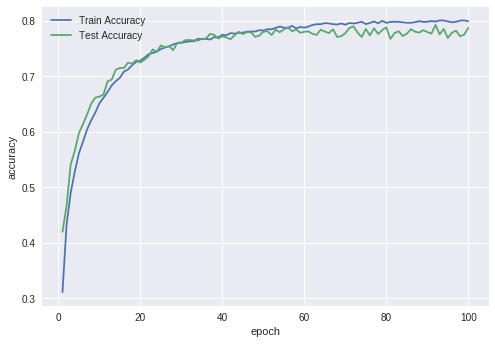

validation loss: 0.6623202399253845
validation accuracy: 0.7873


In [88]:
X_folds=np.array_split(x_train,5)
Y_folds=np.array_split(y_train,5)
scores=list()

X_train,y_train,X_val,y_val=kfold(0,X_folds,Y_folds)
datagen.fit(X_train)
modelhistory = model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,                    
          verbose=1,
          validation_data=(X_val, y_val))
score = model.evaluate(X_val, y_val, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print(score)
print(modelhistory.history)
scores.append(score[1]*100)
plotaccuracy = plt.plot(range(1,epochs+1),modelhistory.history['acc'],range(1,epochs+1),modelhistory.history['val_acc'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(('Train Accuracy','Test Accuracy'))
plt.show(plotaccuracy)


print('validation loss:',modelhistory.history['val_loss'][-1])
print('validation accuracy:',modelhistory.history['val_acc'][-1])


Train on 40000 samples, validate on 10000 samples
Epoch 1/100
40000/40000 [==============================] - 16s 406us/step - loss: 0.6724 - acc: 0.7799 - val_loss: 0.5443 - val_acc: 0.8476
Epoch 2/100
40000/40000 [==============================] - 16s 398us/step - loss: 0.6693 - acc: 0.7846 - val_loss: 0.5004 - val_acc: 0.8504
Epoch 3/100
40000/40000 [==============================] - 16s 396us/step - loss: 0.6604 - acc: 0.7848 - val_loss: 0.5118 - val_acc: 0.8599
Epoch 4/100
40000/40000 [==============================] - 16s 397us/step - loss: 0.6639 - acc: 0.7812 - val_loss: 0.5598 - val_acc: 0.8241
Epoch 5/100
40000/40000 [==============================] - 16s 397us/step - loss: 0.6595 - acc: 0.7849 - val_loss: 0.5265 - val_acc: 0.8457
Epoch 6/100
40000/40000 [==============================] - 16s 395us/step - loss: 0.6509 - acc: 0.7856 - val_loss: 0.5273 - val_acc: 0.8359
Epoch 7/100
40000/40000 [==============================] - 16s 396us/step - loss: 0.6464 - acc: 0.7864 - val_l

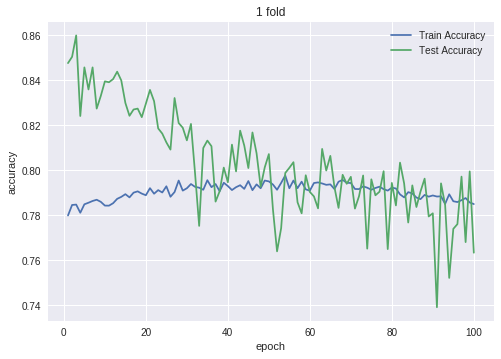

validation loss: 0.7638125333786011
validation accuracy: 0.7634


In [92]:
X_train,y_train,X_val,y_val=kfold(1,X_folds,Y_folds)
datagen.fit(X_train)
modelhistory = model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,                    
          verbose=1,
          validation_data=(X_val, y_val))
score = model.evaluate(X_val, y_val, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print(score)
print(modelhistory.history)
plotaccuracy = plt.plot(range(1,epochs+1),modelhistory.history['acc'],range(1,epochs+1),modelhistory.history['val_acc'])
plt.title("1 fold")
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(('Train Accuracy','Test Accuracy'))
plt.show(plotaccuracy)

scores.append(score[1]*100)
print('validation loss:',modelhistory.history['val_loss'][-1])
print('validation accuracy:',modelhistory.history['val_acc'][-1])


Train on 40000 samples, validate on 10000 samples
Epoch 1/100
40000/40000 [==============================] - 16s 406us/step - loss: 0.7247 - acc: 0.7682 - val_loss: 0.4840 - val_acc: 0.8486
Epoch 2/100
40000/40000 [==============================] - 16s 396us/step - loss: 0.7191 - acc: 0.7722 - val_loss: 0.5859 - val_acc: 0.8323
Epoch 3/100
40000/40000 [==============================] - 16s 396us/step - loss: 0.7189 - acc: 0.7699 - val_loss: 0.5722 - val_acc: 0.8075
Epoch 4/100
40000/40000 [==============================] - 16s 396us/step - loss: 0.7213 - acc: 0.7688 - val_loss: 0.6014 - val_acc: 0.8102
Epoch 5/100
40000/40000 [==============================] - 16s 395us/step - loss: 0.7196 - acc: 0.7692 - val_loss: 0.5622 - val_acc: 0.8215
Epoch 6/100
40000/40000 [==============================] - 16s 395us/step - loss: 0.7255 - acc: 0.7693 - val_loss: 0.5629 - val_acc: 0.8354
Epoch 7/100
40000/40000 [==============================] - 16s 394us/step - loss: 0.7215 - acc: 0.7693 - val_l

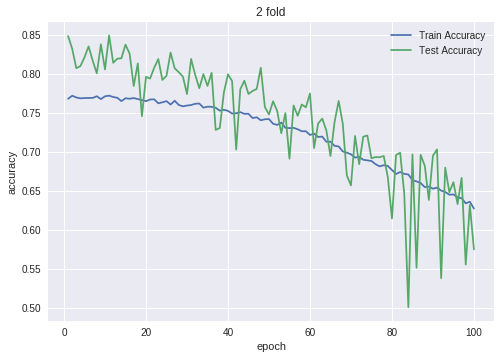

validation loss: 1.3158715118408204
validation accuracy: 0.5752


In [93]:
X_train,y_train,X_val,y_val=kfold(2,X_folds,Y_folds)
datagen.fit(X_train)
modelhistory = model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,                    
          verbose=1,
          validation_data=(X_val, y_val))
score = model.evaluate(X_val, y_val, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print(score)
print(modelhistory.history)
plotaccuracy = plt.plot(range(1,epochs+1),modelhistory.history['acc'],range(1,epochs+1),modelhistory.history['val_acc'])
plt.title("2 fold")
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(('Train Accuracy','Test Accuracy'))
plt.show(plotaccuracy)

scores.append(score[1]*100)
print('validation loss:',modelhistory.history['val_loss'][-1])
print('validation accuracy:',modelhistory.history['val_acc'][-1])


Train on 40000 samples, validate on 10000 samples
Epoch 1/100
40000/40000 [==============================] - 16s 405us/step - loss: 1.2142 - acc: 0.6213 - val_loss: 1.2334 - val_acc: 0.5914
Epoch 2/100
40000/40000 [==============================] - 16s 399us/step - loss: 1.2348 - acc: 0.6143 - val_loss: 1.3731 - val_acc: 0.5650
Epoch 3/100
40000/40000 [==============================] - 16s 398us/step - loss: 1.2210 - acc: 0.6176 - val_loss: 1.0930 - val_acc: 0.6476
Epoch 4/100
40000/40000 [==============================] - 16s 397us/step - loss: 1.2183 - acc: 0.6167 - val_loss: 1.0243 - val_acc: 0.6878
Epoch 5/100
40000/40000 [==============================] - 16s 398us/step - loss: 1.2344 - acc: 0.6145 - val_loss: 1.2195 - val_acc: 0.6246
Epoch 6/100
40000/40000 [==============================] - 16s 398us/step - loss: 1.2387 - acc: 0.6094 - val_loss: 1.3283 - val_acc: 0.5655
Epoch 7/100
40000/40000 [==============================] - 16s 398us/step - loss: 1.2511 - acc: 0.6079 - val_l

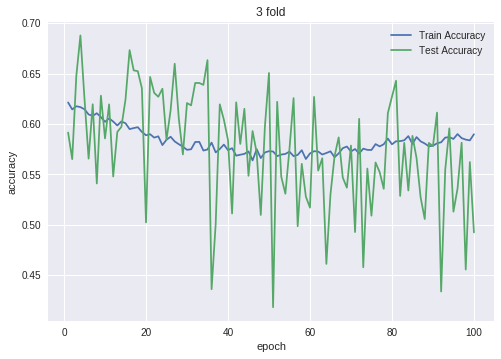

validation loss: 1.4072615747451782
validation accuracy: 0.4923


In [94]:
X_train,y_train,X_val,y_val=kfold(3,X_folds,Y_folds)
datagen.fit(X_train)
modelhistory = model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,                    
          verbose=1,
          validation_data=(X_val, y_val))
score = model.evaluate(X_val, y_val, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print(score)
print(modelhistory.history)
plotaccuracy = plt.plot(range(1,epochs+1),modelhistory.history['acc'],range(1,epochs+1),modelhistory.history['val_acc'])
plt.title("3 fold")
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(('Train Accuracy','Test Accuracy'))
plt.show(plotaccuracy)

scores.append(score[1]*100)
print('validation loss:',modelhistory.history['val_loss'][-1])
print('validation accuracy:',modelhistory.history['val_acc'][-1])


Train on 40000 samples, validate on 10000 samples
Epoch 1/100
40000/40000 [==============================] - 16s 404us/step - loss: 1.3110 - acc: 0.5807 - val_loss: 1.4665 - val_acc: 0.4804
Epoch 2/100
40000/40000 [==============================] - 16s 401us/step - loss: 1.3001 - acc: 0.5860 - val_loss: 1.1412 - val_acc: 0.6366
Epoch 3/100
40000/40000 [==============================] - 16s 398us/step - loss: 1.3100 - acc: 0.5818 - val_loss: 0.9795 - val_acc: 0.6707
Epoch 4/100
40000/40000 [==============================] - 16s 398us/step - loss: 1.3128 - acc: 0.5828 - val_loss: 1.3560 - val_acc: 0.5094
Epoch 5/100
40000/40000 [==============================] - 16s 401us/step - loss: 1.3117 - acc: 0.5816 - val_loss: 1.4850 - val_acc: 0.4469
Epoch 6/100
40000/40000 [==============================] - 16s 397us/step - loss: 1.2989 - acc: 0.5839 - val_loss: 1.3819 - val_acc: 0.5490
Epoch 7/100
40000/40000 [==============================] - 16s 401us/step - loss: 1.3037 - acc: 0.5788 - val_l

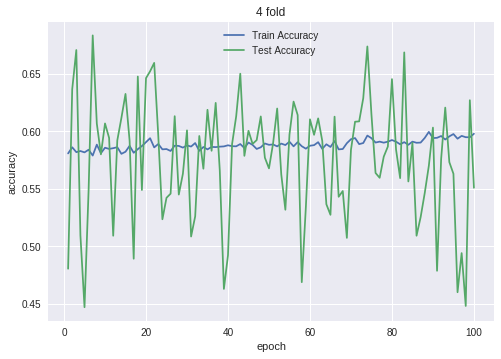

validation loss: 1.3134382343292237
validation accuracy: 0.5508


In [95]:
X_train,y_train,X_val,y_val=kfold(4,X_folds,Y_folds)
datagen.fit(X_train)
modelhistory = model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,                    
          verbose=1,
          validation_data=(X_val, y_val))
score = model.evaluate(X_val, y_val, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print(score)
print(modelhistory.history)
plotaccuracy = plt.plot(range(1,epochs+1),modelhistory.history['acc'],range(1,epochs+1),modelhistory.history['val_acc'])
plt.title("4 fold")
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(('Train Accuracy','Test Accuracy'))
plt.show(plotaccuracy)

scores.append(score[1]*100)
print('validation loss:',modelhistory.history['val_loss'][-1])
print('validation accuracy:',modelhistory.history['val_acc'][-1])


In [96]:
print(scores)
mean=np.mean(scores)
print("total mean of 4 runs is ",mean)

[78.73, 76.34, 57.52, 49.230000000000004, 55.08]
total mean of 4 runs is  63.379999999999995
